# **제목 : 배달팁 클러스터 분석**

클러스터 레벨을 나누기 위해 요기요 사이트를 크롤링하여 저장한 csv파일로 클러스트터의 비중을 시각화 한다.

수집한 데이터
1. 요기요 배달팁 csv파일
- 가게명 : 요기요에 등록된 가게 이름
- 판매업종 : 해당 가게의 판매종에 따라 나눔 (ex, 5:치킨, 6:피자/양식, 7:중국집 등)
- 배달소요시간 : 해당 가게의 평균 배달 소요 시간(단위 : 분)
- 평점 : 소비자들이 남긴 해당 가게의 별점(단위 : 점)
- 리뷰수 : 소비자들이 남긴 해당 가게의 리뷰 개수(단위 : 개)
- 배달기준금액 : 해당 가게의 기본 배달 기준 금액(단위 : 원)
- 배달비 : 해당 가게의 배달팁(단위 : 원)

In [1]:
#맑은고딕체로 한글 폰치 패치
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
#해당 그래프와 데이터프레임 파일 정리를 위해 필요한 라이브러리
import pandas as pd
import math

In [3]:
#csv파일을 업로드하여 데이터프레임으로 tip에 저장(column명이 한글이라서 encoding시, CP949로 해줌)
tip = pd.read_csv('./final_pro/YogiyoTip2.csv', encoding='CP949', index_col=0, header=0, engine='python')
tip.head()

,판매업종,배달소요시간,평점,리뷰수,배달기준금액,배달비
가게명,,,,,,
굽네치킨&피자-방학1동점,5,50,4.9,1019,15000,3000
굽네치킨&피자-방학1동점,5,50,4.9,1019,15000,3000
파무쳐두마리파닭,5,61,4.4,781,15000,2000
동근이숯불두마리치킨-노원점,5,56,4.9,1043,15900,2500
불아더숯불바베큐-노원점,5,60,5.0,132,16000,4000


### 데이터 준비 및 탐색

In [4]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 굽네치킨&피자-방학1동점 to 켁터스커피
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   판매업종    958 non-null    int64  
 1   배달소요시간  958 non-null    int64  
 2   평점      958 non-null    float64
 3   리뷰수     958 non-null    int64  
 4   배달기준금액  958 non-null    int64  
 5   배달비     958 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 52.4+ KB


In [5]:
# 중복 레코드 제거
tip.drop_duplicates(inplace=True)

print(tip.shape) #작업 확인용 출력

(950, 6)


#### - 평점 수, 리뷰 수, 배달기준금액 수, 배달비 수 탐색

In [6]:
pd.DataFrame([{'리뷰수':len(tip['리뷰수'].value_counts()),
              '배달기준금액':len(tip['배달기준금액'].value_counts()),
              '배달비':len(tip['배달비'].value_counts())}],
             columns = ['리뷰수', '배달기준금액', '배달비'],
            index = ['counts'])

,리뷰수,배달기준금액,배달비
counts,485,61,43


In [7]:
tip['판매업종'].value_counts()

12    119
5     118
9     118
6     117
8     116
13    116
11    114
10     68
7      64
Name: 판매업종, dtype: int64

In [8]:
tip2 = tip.drop(['판매업종', '배달소요시간', '평점'], axis=1)
tip2

,리뷰수,배달기준금액,배달비
가게명,,,
굽네치킨&피자-방학1동점,1019,15000,3000
파무쳐두마리파닭,781,15000,2000
동근이숯불두마리치킨-노원점,1043,15900,2500
불아더숯불바베큐-노원점,132,16000,4000
롯데리아-마들역점,3879,10000,3500
...,...,...,...
과일팡-창동점,171,15000,5400
매머드익스프레스-창동점,57,3000,4500
텀브커피쌍문점,3,10000,4400


#### - 현재 데이터 값의 분포 확인하기

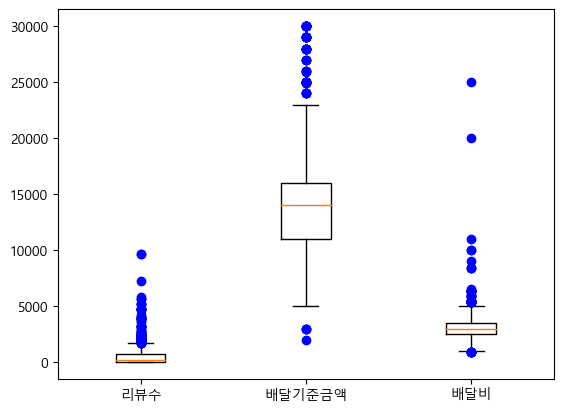

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
plt.rc('font', family=font) #한글 폰트를 사용하기 위해
ax.boxplot([tip2['리뷰수'], tip2['배달기준금액'], tip2['배달비']], sym='bo')
plt.xticks([1, 2, 3], ['리뷰수','배달기준금액', '배달비'])

plt.show()

#### - 데이터 값의 왜곡(치우침)을 줄이기 위한 작업 : 로그 함수로 분포 조정

In [10]:
import numpy as np

tip2['리뷰수_log'] = np.log1p(tip2['리뷰수'])
tip2['배달기준금액_log'] = np.log1p(tip2['배달기준금액'])
tip2['배달비_log'] = np.log1p(tip2['배달비'])

tip2.head()  #작업 확인용 출력

,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log
가게명,,,,,,
굽네치킨&피자-방학1동점,1019,15000,3000,6.927558,9.615872,8.006701
파무쳐두마리파닭,781,15000,2000,6.661855,9.615872,7.601402
동근이숯불두마리치킨-노원점,1043,15900,2500,6.950815,9.674137,7.824446
불아더숯불바베큐-노원점,132,16000,4000,4.890349,9.680406,8.294300
롯데리아-마들역점,3879,10000,3500,8.263590,9.210440,8.160804


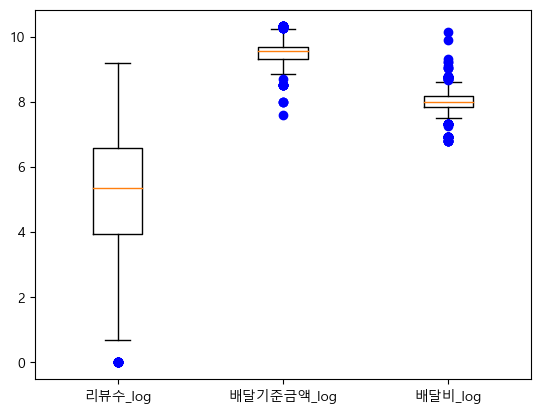

In [11]:
# 조정된 데이터 분포를 다시 박스플롯으로 확인하기
fig, ax = plt.subplots()
plt.rc('font', family=font) #한글 폰트를 사용하기 위해
ax.boxplot([tip2['리뷰수_log'],tip2['배달기준금액_log'], tip2['배달비_log']], sym='bo')
plt.xticks([1, 2, 3], ['리뷰수_log', '배달기준금액_log', '배달비_log'])
plt.show()

### 3) 모델 구축 : K-평균 군집화 모델 

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [13]:
X_features = tip2[['리뷰수_log', '배달기준금액_log', '배달비_log']].values

In [14]:
# 정규 분포로 다시 스케일링하기
from sklearn.preprocessing import StandardScaler

X_features_scaled = StandardScaler().fit_transform(X_features)

### - 최적의 k 찾기 (1) 엘보우 방법

C:\Users\Lab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


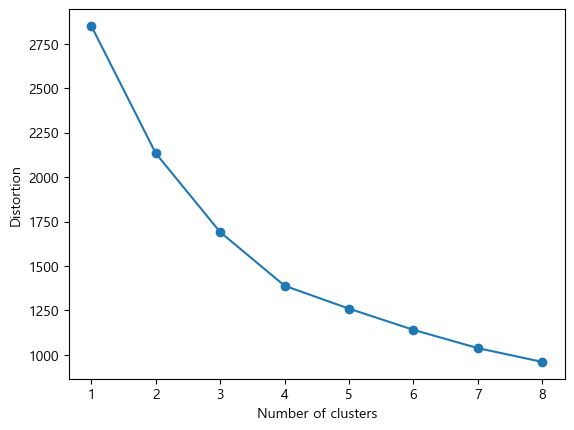

In [15]:
distortions = []

for i in range(1, 9):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)   # 모델 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,9), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0) # 모델 생성

# 모델 학습과 결과 예측(클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

In [17]:
tip2['ClusterLabel'] = Y_labels

tip2.head()  #작업 확인용 출력

,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
가게명,,,,,,,
굽네치킨&피자-방학1동점,1019,15000,3000,6.927558,9.615872,8.006701,1
파무쳐두마리파닭,781,15000,2000,6.661855,9.615872,7.601402,1
동근이숯불두마리치킨-노원점,1043,15900,2500,6.950815,9.674137,7.824446,1
불아더숯불바베큐-노원점,132,16000,4000,4.890349,9.680406,8.294300,2
롯데리아-마들역점,3879,10000,3500,8.263590,9.210440,8.160804,0


## 4) 결과 분석 및 시각화

### - 최적의 k 찾기 (2) 실루엣 계수에 따른 각 클러스터의 비중 시각화 함수 정의

In [18]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

### - 클러스터 수에 따른 클러스터 데이터 분포의 시각화 함수 정의

In [19]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

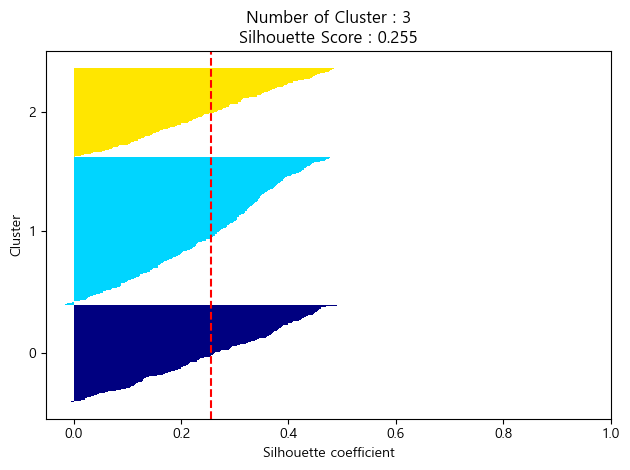

In [20]:
silhouetteViz(3, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

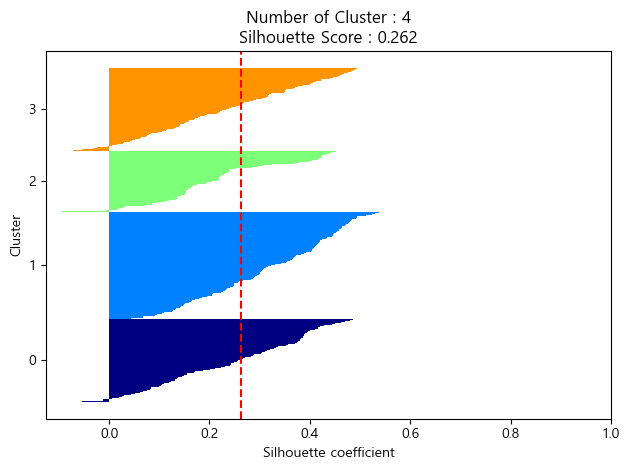

In [21]:
silhouetteViz(4, X_features_scaled) #클러스터 4개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

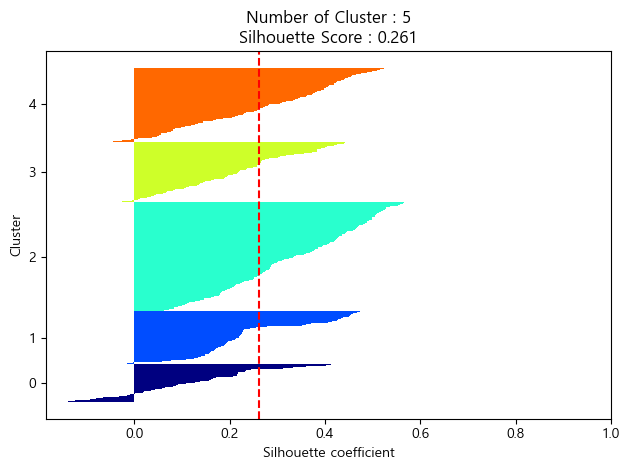

In [22]:
silhouetteViz(5, X_features_scaled) #클러스터 5개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

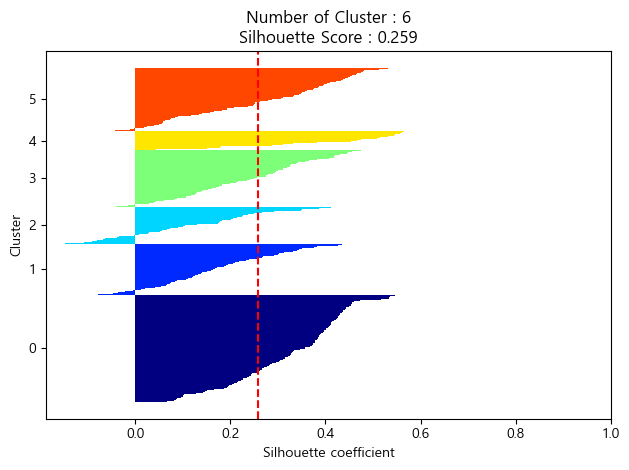

In [23]:
silhouetteViz(6, X_features_scaled) #클러스터 6개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

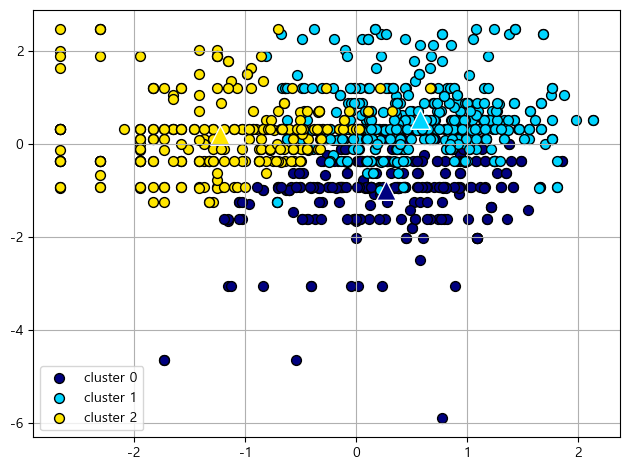

In [25]:
plt.rcParams['axes.unicode_minus'] = False # -부호 출력 오류로 코드 추가
clusterScatter(3, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

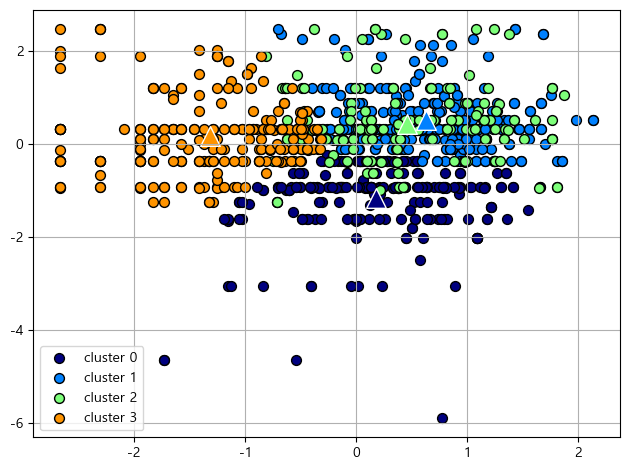

In [26]:
plt.rcParams['axes.unicode_minus'] = False # -부호 출력 오류로 코드 추가
clusterScatter(4, X_features_scaled)  #클러스터 4개인 경우의 클러스터 데이터 분포 시각화

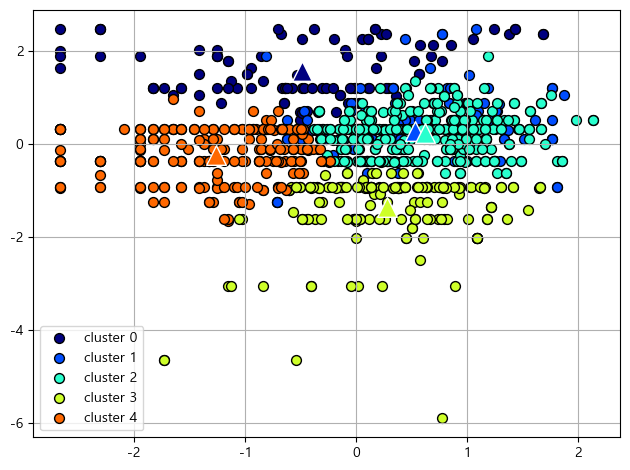

In [27]:
plt.rcParams['axes.unicode_minus'] = False # -부호 출력 오류로 코드 추가
clusterScatter(5, X_features_scaled)  #클러스터 5개인 경우의 클러스터 데이터 분포 시각화

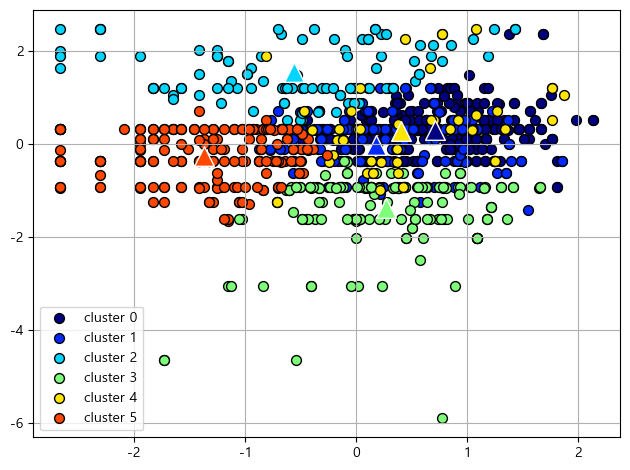

In [28]:
plt.rcParams['axes.unicode_minus'] = False # -부호 출력 오류로 코드 추가
clusterScatter(6, X_features_scaled)  #클러스터 6개인 경우의 클러스터 데이터 분포 시각화

### 결정된 k를 적용하여 최적의 K-mans 모델 완성

In [29]:
best_cluster = 4

kmeans = KMeans(n_clusters=best_cluster, random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)

In [30]:
tip2['ClusterLabel'] = Y_labels

tip2.head()   #작업 확인용 출력

,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
가게명,,,,,,,
굽네치킨&피자-방학1동점,1019,15000,3000,6.927558,9.615872,8.006701,1
파무쳐두마리파닭,781,15000,2000,6.661855,9.615872,7.601402,2
동근이숯불두마리치킨-노원점,1043,15900,2500,6.950815,9.674137,7.824446,1
불아더숯불바베큐-노원점,132,16000,4000,4.890349,9.680406,8.294300,1
롯데리아-마들역점,3879,10000,3500,8.263590,9.210440,8.160804,0


#### - ClusterLabel이 추가된 데이터를 파일로 저장

In [31]:
tip2.to_csv('./final_pro/YogiyoTip2_Cluster.csv')

## << 클러스터 분석하기 >>

### 1) 각 클러스터의 가게수 

In [32]:
tip2 = tip2.reset_index()
tip2

,가게명,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
0,굽네치킨&피자-방학1동점,1019,15000,3000,6.927558,9.615872,8.006701,1
1,파무쳐두마리파닭,781,15000,2000,6.661855,9.615872,7.601402,2
2,동근이숯불두마리치킨-노원점,1043,15900,2500,6.950815,9.674137,7.824446,1
3,불아더숯불바베큐-노원점,132,16000,4000,4.890349,9.680406,8.294300,1
4,롯데리아-마들역점,3879,10000,3500,8.263590,9.210440,8.160804,0
...,...,...,...,...,...,...,...,...
945,과일팡-창동점,171,15000,5400,5.147494,9.615872,8.594339,1
946,매머드익스프레스-창동점,57,3000,4500,4.060443,8.006701,8.412055,0
947,텀브커피쌍문점,3,10000,4400,1.386294,9.210440,8.389587,3
948,샐러드로우&트라타-노원점,139,11000,2700,4.941642,9.305741,7.901377,0


### 2) 각 클러스터의 데이터프레임

In [33]:
tip2[tip2['ClusterLabel']==0]

,가게명,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
4,롯데리아-마들역점,3879,10000,3500,8.263590,9.210440,8.160804,0
15,꼬꼬스토리-상계보람점,266,8000,2900,5.587249,8.987322,7.972811,0
26,큰집닭강정-마들점,162,8000,3500,5.093750,8.987322,8.160804,0
29,꼬꼬스토리닭강정-수락산역점,744,8000,2900,6.613384,8.987322,7.972811,0
46,국제통닭-노원직영점,240,10000,2000,5.484797,9.210440,7.601402,0
...,...,...,...,...,...,...,...,...
935,이디야커피-방학중앙점,29,10000,3000,3.401197,9.210440,8.006701,0
940,카페23,64,8000,2900,4.174387,8.987322,7.972811,0
946,매머드익스프레스-창동점,57,3000,4500,4.060443,8.006701,8.412055,0
948,샐러드로우&트라타-노원점,139,11000,2700,4.941642,9.305741,7.901377,0


In [34]:
tip2[tip2['ClusterLabel']==1]

,가게명,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
0,굽네치킨&피자-방학1동점,1019,15000,3000,6.927558,9.615872,8.006701,1
2,동근이숯불두마리치킨-노원점,1043,15900,2500,6.950815,9.674137,7.824446,1
3,불아더숯불바베큐-노원점,132,16000,4000,4.890349,9.680406,8.294300,1
5,BBQ-도봉역점,426,17000,3000,6.056784,9.741027,8.006701,1
6,썬더치킨-상계점,504,14900,3000,6.224558,9.609184,8.006701,1
...,...,...,...,...,...,...,...,...
903,배스킨라빈스-수락산역점,346,13500,3000,5.849325,9.510519,8.006701,1
909,던킨-마들점,816,13000,3000,6.705639,9.472782,8.006701,1
920,배스킨라빈스-노원역점,235,13500,3000,5.463832,9.510519,8.006701,1
930,빙달DessertCafe-노원점,507,15000,2500,6.230481,9.615872,7.824446,1


In [35]:
tip2[tip2['ClusterLabel']==2]

,가게명,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
1,파무쳐두마리파닭,781,15000,2000,6.661855,9.615872,7.601402,2
10,후라이드참잘하는집-상계점,5217,10000,2000,8.559869,9.210440,7.601402,2
11,이끌리오-중계점,331,13000,1000,5.805135,9.472782,6.908755,2
14,맛닭꼬-상계로또점,367,10000,1000,5.908083,9.210440,6.908755,2
21,처갓집양념치킨-노원역점,1328,17000,2000,7.192182,9.741027,7.601402,2
...,...,...,...,...,...,...,...,...
883,파리바게뜨-도봉1동점,1103,12000,2200,7.006695,9.392745,7.696667,2
884,파리바게뜨-수락산역점,195,12000,2200,5.278115,9.392745,7.696667,2
904,파리바게뜨-상계보람점,1072,12000,2200,6.978214,9.392745,7.696667,2
905,수제디저트카페쥬드,217,11000,1500,5.384495,9.305741,7.313887,2


In [36]:
tip2[tip2['ClusterLabel']==3]

,가게명,리뷰수,배달기준금액,배달비,리뷰수_log,배달기준금액_log,배달비_log,ClusterLabel
7,맛있는파닭-방학점,33,15000,4000,3.526361,9.615872,8.294300,3
27,푸라닭-하계점,61,16900,4000,4.127134,9.735128,8.294300,3
56,순살만공격-상계점,88,14000,4000,4.488636,9.546884,8.294300,3
60,기영이숯불두마리치킨-노원상계점,45,15000,2500,3.828641,9.615872,7.824446,3
63,기영이숯불두마리치킨-도봉방학점,69,17000,4000,4.248495,9.741027,8.294300,3
...,...,...,...,...,...,...,...,...
941,카페라운드,4,10000,3400,1.609438,9.210440,8.131825,3
942,풀무원녹즙-도봉홈가맹점,0,10000,2000,0.000000,9.210440,7.601402,3
943,카페플라워-도봉점,6,12000,2900,1.945910,9.392745,7.972811,3
944,사계-상계점,0,12000,2900,0.000000,9.392745,7.972811,3


In [37]:
tip2.groupby('ClusterLabel')['가게명'].count()

ClusterLabel
0    235
1    306
2    172
3    237
Name: 가게명, dtype: int64

### 3) 각 클러스터의 특징

In [38]:
tip2_cluster_df = tip2.drop(['리뷰수_log', '배달기준금액_log', '배달비_log'],axis=1, inplace=False)#필요없는 컬럼 삭제

In [39]:
# 클러스터별 분석
tip2_cluster_df.drop(['가게명'],axis=1, inplace=False).groupby('ClusterLabel').mean()

,리뷰수,배달기준금액,배달비
ClusterLabel,,,
0,461.842553,9511.063830,3480.000000
1,955.686275,16316.013072,3494.771242
2,871.290698,16084.302326,1726.744186
3,23.392405,14738.396624,3574.683544
